<a href="https://colab.research.google.com/github/yommigold/CAPSTONE_Building-a-dashboard-with-Cognos/blob/main/Capstone_Final_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Download the file
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2024-04-11 03:54:44--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite’

m4_survey_data.sqli 100%[===================>]  34.98M  47.8MB/s    in 0.7s    

2024-04-11 03:54:45 (47.8 MB/s) - ‘m4_survey_data.sqlite’ saved [36679680/36679680]



In [3]:
# Connect to the database.

import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

In [4]:
# Import pandas module.

import pandas as pd

In [5]:
# list tables in the database

import pandas as pd
# List all tables in the database.

tables = pd.read_sql_query("SELECT NAME FROM sqlite_master WHERE TYPE = 'table'", conn)

# Print the table names.

print(tables)


                      name
0                 EduOther
1                  DevType
2                  LastInt
3               JobFactors
4                 WorkPlan
5            WorkChallenge
6       LanguageWorkedWith
7   LanguageDesireNextYear
8       DatabaseWorkedWith
9   DatabaseDesireNextYear
10      PlatformWorkedWith
11  PlatformDesireNextYear
12      WebFrameWorkedWith
13  WebFrameDesireNextYear
14      MiscTechWorkedWith
15  MiscTechDesireNextYear
16              DevEnviron
17              Containers
18               SOVisitTo
19            SONewContent
20                  Gender
21               Sexuality
22               Ethnicity
23                  master


In [6]:
# list fields in LanguageWorkedWith table

import pandas as pd
# List fields in LanguageWorkedWith table.

fields = pd.read_sql_query("SELECT * FROM LanguageWorkedWith LIMIT 0", conn)

# Print the field names.

print(fields.columns.values)


['Respondent' 'LanguageWorkedWith']


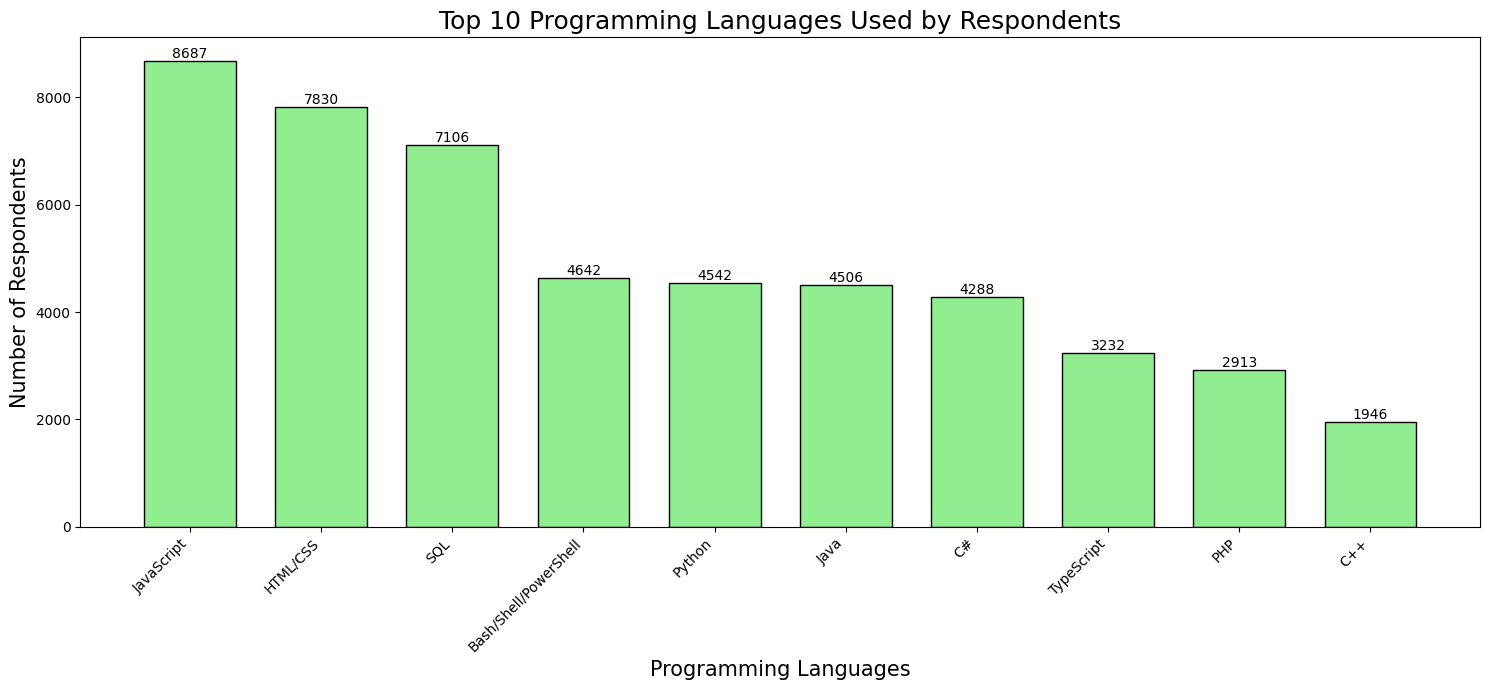

In [7]:
# Capture Top 10 LanguageWorkedWith. Visualize as a Bar chart. Utilize Bars, Length, Color fields of Bar chart. Include Show value labels feature. Include a proper Chart title.

import pandas as pd
import matplotlib.pyplot as plt

# Read data from the database
df = pd.read_sql_query("SELECT LanguageWorkedWith, COUNT(*) AS Total FROM LanguageWorkedWith GROUP BY LanguageWorkedWith ORDER BY Total DESC LIMIT 10", conn)

# Prepare data for the bar chart
languages = df['LanguageWorkedWith'].tolist()
totals = df['Total'].tolist()

# Create the bar chart
plt.figure(figsize=(15, 7))
bars = plt.bar(languages, totals, color='lightgreen', edgecolor='black', width=0.7)
plt.xlabel("Programming Languages", fontsize=15)
plt.ylabel("Number of Respondents", fontsize=15)
plt.title("Top 10 Programming Languages Used by Respondents", fontsize=18)

# Add data labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, yval, ha='center', va='bottom')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


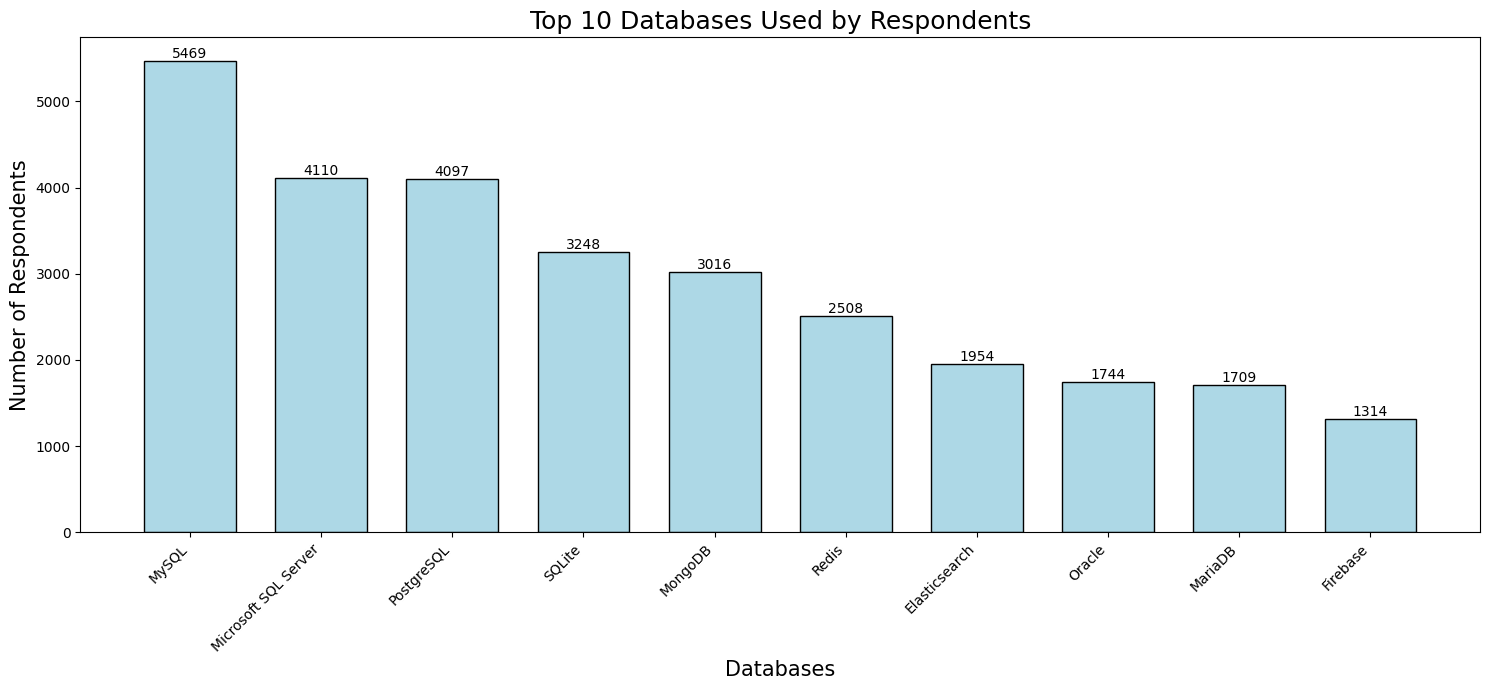

In [8]:
# Capture Top 10 DatabaseWorkedWith, Visualize as a Column chart. Utilize Bars, Length, Color fields of Column chart. Include Show value labels feature. Include a proper Chart title.

import pandas as pd
import matplotlib.pyplot as plt
# Read data from the database
df = pd.read_sql_query("SELECT DatabaseWorkedWith, COUNT(*) AS Total FROM DatabaseWorkedWith GROUP BY DatabaseWorkedWith ORDER BY Total DESC LIMIT 10", conn)

# Prepare data for the bar chart
databases = df['DatabaseWorkedWith'].tolist()
totals = df['Total'].tolist()

# Create the bar chart
plt.figure(figsize=(15, 7))
bars = plt.bar(databases, totals, color='lightblue', edgecolor='black', width=0.7)
plt.xlabel("Databases", fontsize=15)
plt.ylabel("Number of Respondents", fontsize=15)
plt.title("Top 10 Databases Used by Respondents", fontsize=18)

# Add data labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, yval, ha='center', va='bottom')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


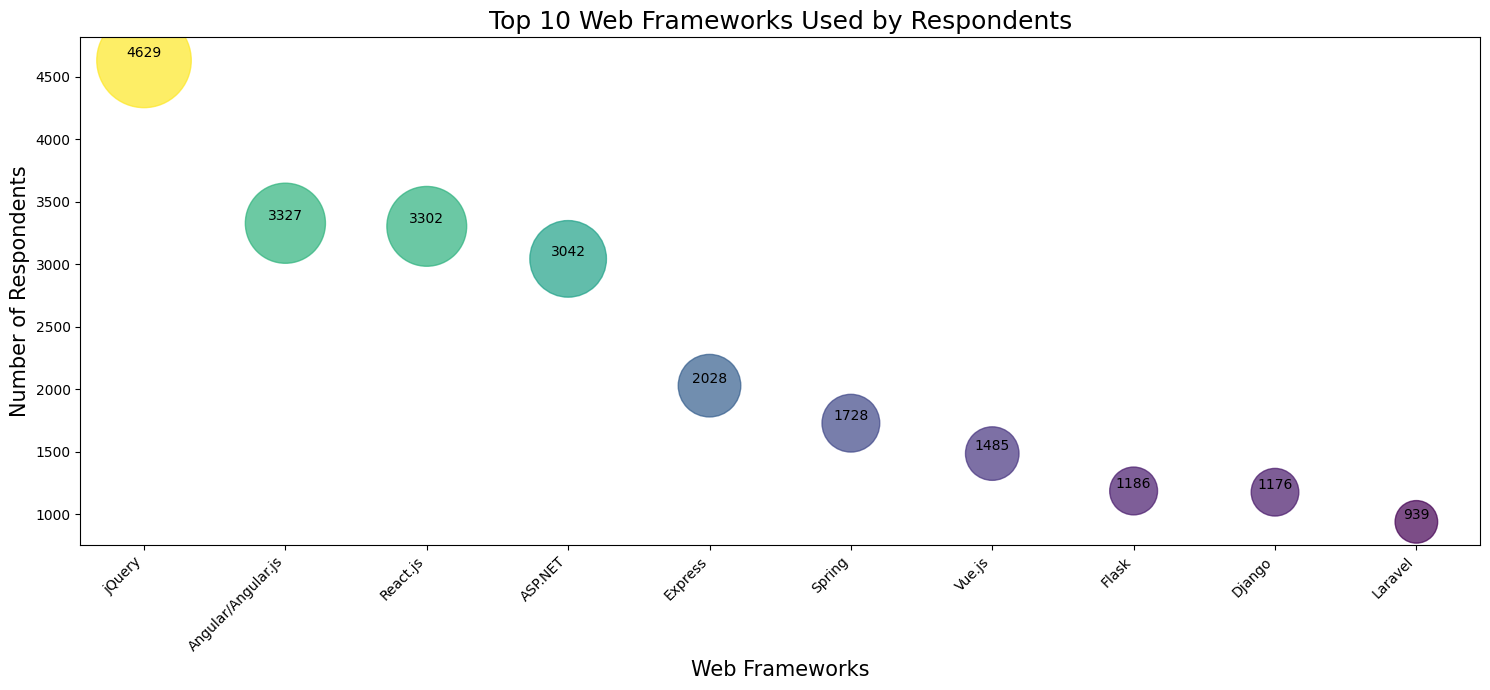

In [9]:
# Capture Top 10 WebFrameWorkedWith. Visualize as a Hierarchy bubble chart. Utilize Bubbles, Size, Color fields of Hierarchy bubble chart. Include a proper Chart title

import pandas as pd
import matplotlib.pyplot as plt
# Read data from the database
df = pd.read_sql_query("SELECT WebFrameWorkedWith, COUNT(*) AS Total FROM WebFrameWorkedWith GROUP BY WebFrameWorkedWith ORDER BY Total DESC LIMIT 10", conn)

# Prepare data for the bubble chart
labels = df['WebFrameWorkedWith'].tolist()
totals = df['Total'].tolist()

# Create the bubble chart
plt.figure(figsize=(15, 7))
plt.title("Top 10 Web Frameworks Used by Respondents", fontsize=18)
plt.scatter(labels, totals, s=totals, c=totals, cmap='viridis', alpha=0.7)

# Add data labels
for label, total in zip(labels, totals):
    plt.text(label, total + 1, total, ha='center', va='bottom')

plt.xlabel("Web Frameworks", fontsize=15)
plt.ylabel("Number of Respondents", fontsize=15)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


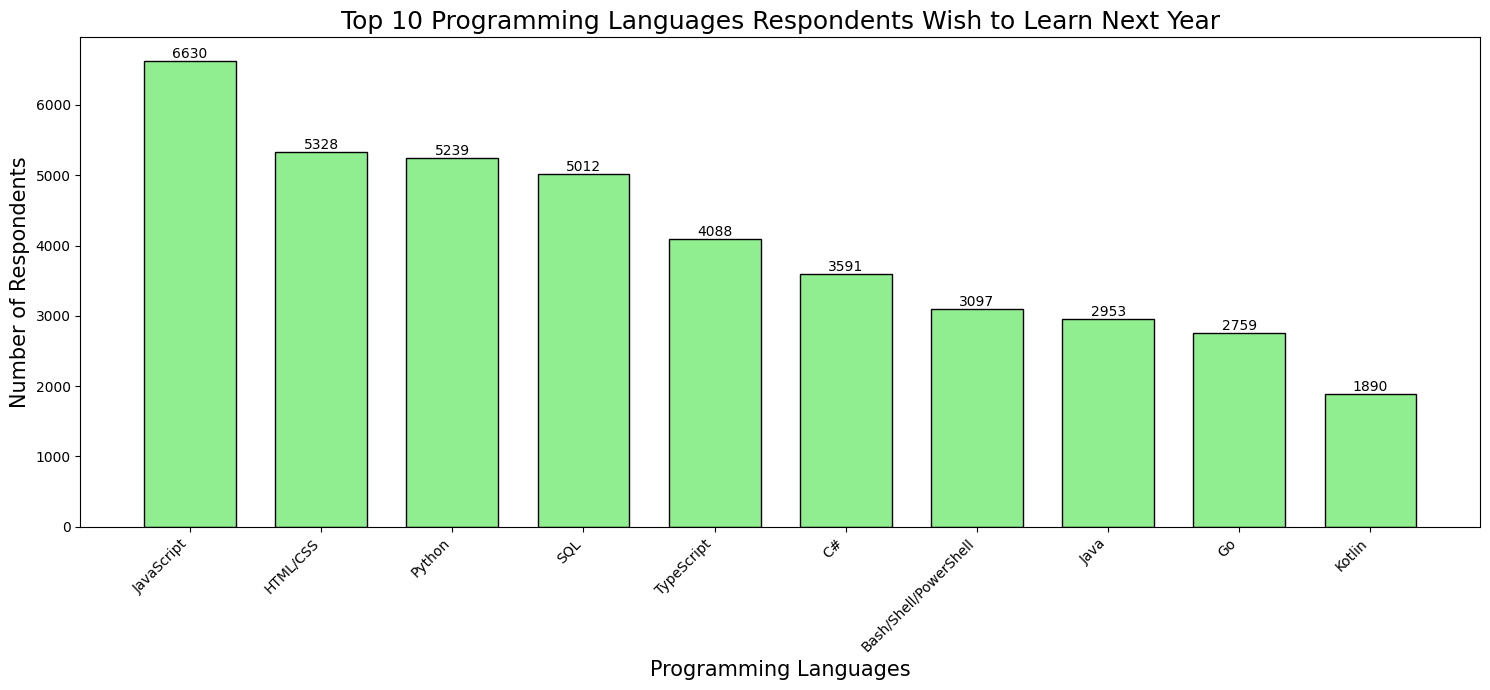

In [10]:
# Capture Top 10 LanguageDesireNextYear. Visualize as a Bar chart. Utilize Bars, Length, Color fields of Bar chart. Include Show value labels feature. Include a proper Chart title.

import pandas as pd
import matplotlib.pyplot as plt
# Read data from the database
df = pd.read_sql_query("SELECT LanguageDesireNextYear, COUNT(*) AS Total FROM LanguageDesireNextYear GROUP BY LanguageDesireNextYear ORDER BY Total DESC LIMIT 10", conn)

# Prepare data for the bar chart
languages = df['LanguageDesireNextYear'].tolist()
totals = df['Total'].tolist()

# Create the bar chart
plt.figure(figsize=(15, 7))
bars = plt.bar(languages, totals, color='lightgreen', edgecolor='black', width=0.7)
plt.xlabel("Programming Languages", fontsize=15)
plt.ylabel("Number of Respondents", fontsize=15)
plt.title("Top 10 Programming Languages Respondents Wish to Learn Next Year", fontsize=18)

# Add data labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, yval, ha='center', va='bottom')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


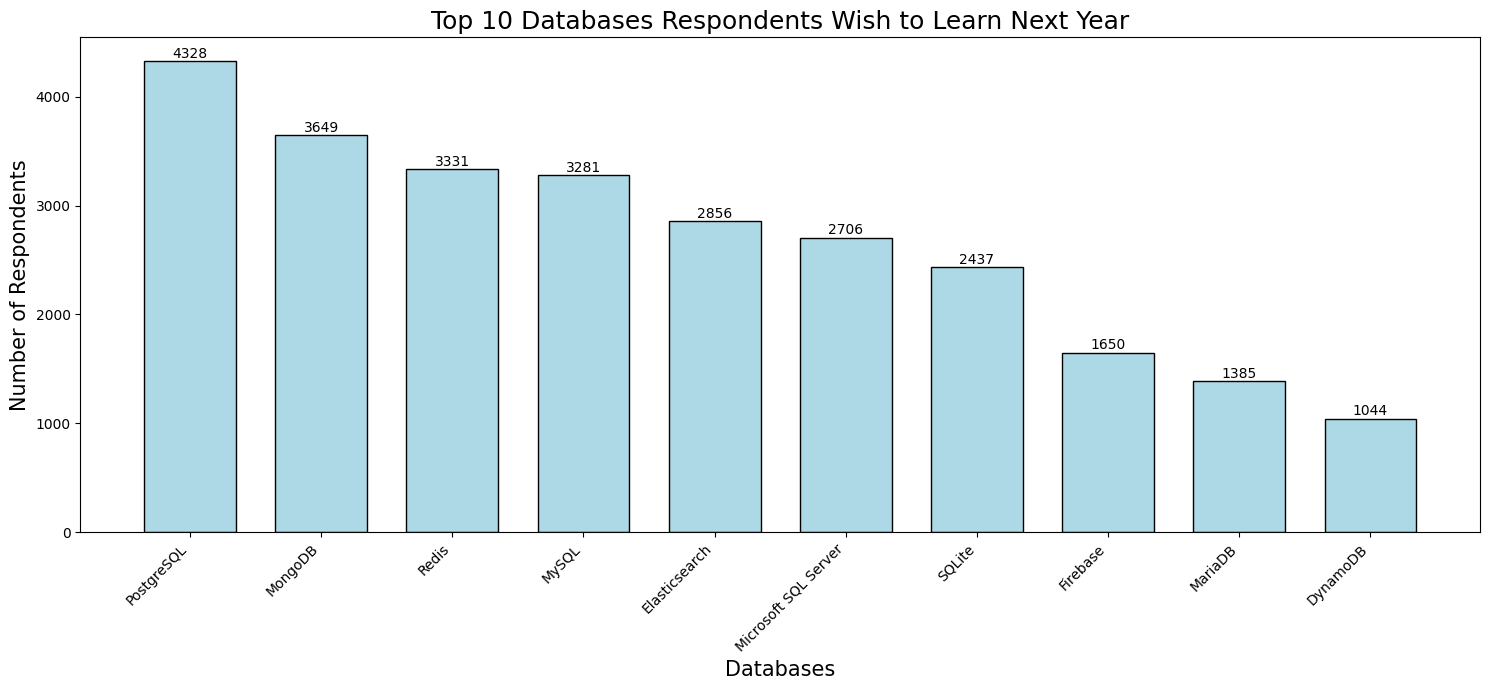

In [11]:
# Top 10 DatabaseDesireNextYear

import pandas as pd
import matplotlib.pyplot as plt
# Read data from the database
df = pd.read_sql_query("SELECT DatabaseDesireNextYear, COUNT(*) AS Total FROM DatabaseDesireNextYear GROUP BY DatabaseDesireNextYear ORDER BY Total DESC LIMIT 10", conn)

# Prepare data for the bar chart
databases = df['DatabaseDesireNextYear'].tolist()
totals = df['Total'].tolist()

# Create the bar chart
plt.figure(figsize=(15, 7))
bars = plt.bar(databases, totals, color='lightblue', edgecolor='black', width=0.7)
plt.xlabel("Databases", fontsize=15)
plt.ylabel("Number of Respondents", fontsize=15)
plt.title("Top 10 Databases Respondents Wish to Learn Next Year", fontsize=18)

# Add data labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, yval, ha='center', va='bottom')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


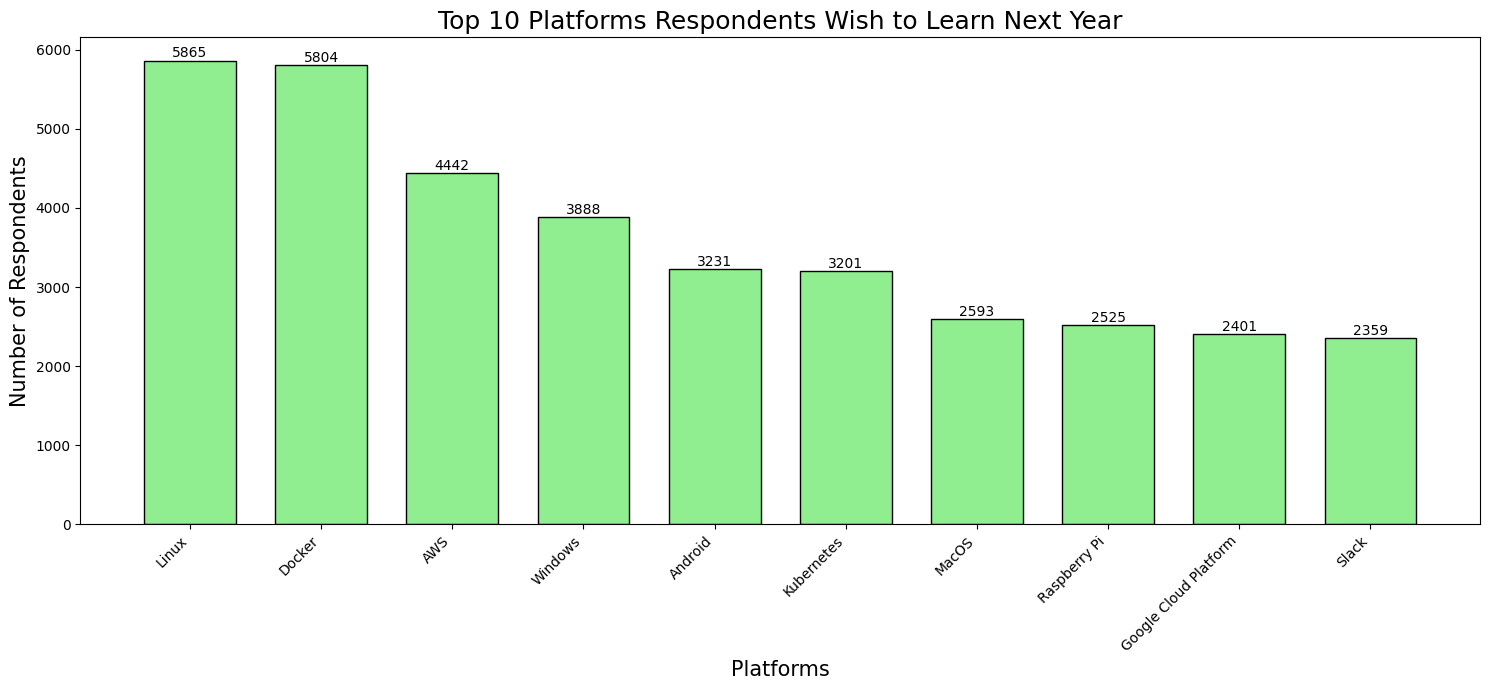

In [18]:
# capture PlatformDesireNextYear


import pandas as pd
import matplotlib.pyplot as plt
# Read data from the database
df = pd.read_sql_query("SELECT PlatformDesireNextYear, COUNT(*) AS Total FROM PlatformDesireNextYear GROUP BY PlatformDesireNextYear ORDER BY Total DESC LIMIT 10", conn)

# Prepare data for the bar chart
platforms = df['PlatformDesireNextYear'].tolist()
totals = df['Total'].tolist()

# Create the bar chart
plt.figure(figsize=(15, 7))
bars = plt.bar(platforms, totals, color='lightgreen', edgecolor='black', width=0.7)
plt.xlabel("Platforms", fontsize=15)
plt.ylabel("Number of Respondents", fontsize=15)
plt.title("Top 10 Platforms Respondents Wish to Learn Next Year", fontsize=18)

# Add data labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, yval, ha='center', va='bottom')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


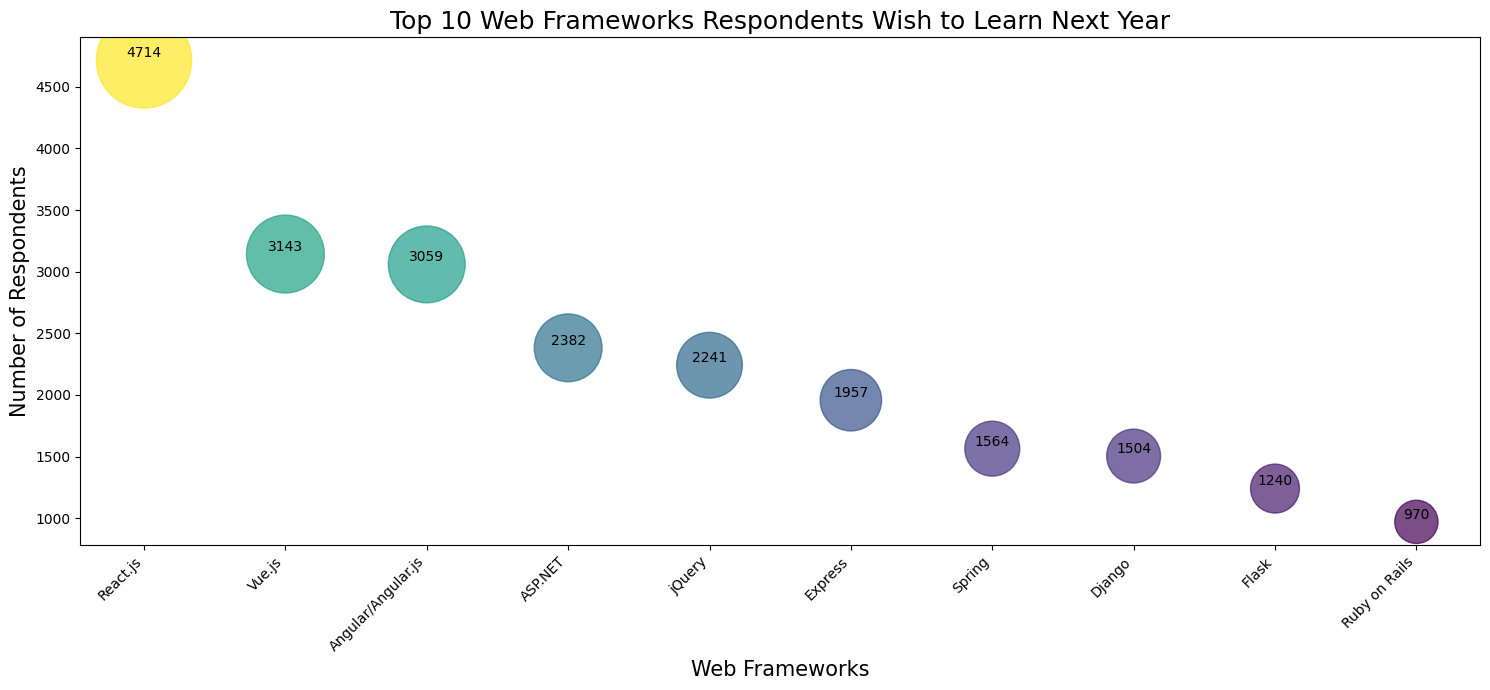

In [19]:
# Capture Top 10 WebFrameDesireNextYear
# Visualize as a Hierarchy bubble chart


import pandas as pd
import matplotlib.pyplot as plt
# Read data from the database
df = pd.read_sql_query("SELECT WebFrameDesireNextYear, COUNT(*) AS Total FROM WebFrameDesireNextYear GROUP BY WebFrameDesireNextYear ORDER BY Total DESC LIMIT 10", conn)

# Prepare data for the bubble chart
labels = df['WebFrameDesireNextYear'].tolist()
totals = df['Total'].tolist()

# Create the bubble chart
plt.figure(figsize=(15, 7))
plt.title("Top 10 Web Frameworks Respondents Wish to Learn Next Year", fontsize=18)
plt.scatter(labels, totals, s=totals, c=totals, cmap='viridis', alpha=0.7)

# Add data labels
for label, total in zip(labels, totals):
    plt.text(label, total + 1, total, ha='center', va='bottom')

plt.xlabel("Web Frameworks", fontsize=15)
plt.ylabel("Number of Respondents", fontsize=15)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
